In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
excel = pd.read_excel('../NewsResult.xlsx')

In [3]:
len(excel)

12784

In [4]:
excel.head(5)

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.100701e+06,20220207,세계일보,이영균,"포항 앞바다서 선박 2척 충돌, 80대 어부 구조해 이송",지역>경북,지역>경남,지역>경기,NaN,NaN,NaN,NaN,"연안,경북,영일만항,포항,북구,용한항","포항해양경찰서,포항해경,포항시,승선","포항,앞바다,충돌,선박,구조,어부,이송,도선선,충돌,전복,어선,7일,포항해양경찰서,...","승선원,포항,앞바다,포항해양경찰서,경북,a호,포항해경,b호,저체온증,구조정,영일만항...",도선선과 충돌해 전복된 1t급 어선. 포항해양경찰서 제공 7일 오전 8시 8분쯤 경...,http://www.segye.com/content/html/2022/02/07/2...,NaN
1,1.101101e+06,20220207,한국일보,이동렬,"""군민 행복을 위한 행정의 변화 이어 갈 것""",지역>대전,지역>충북,지역>강원,범죄>기업범죄>거래제한,NaN,NaN,백,"상족암군립공원,양촌,고성,동계전지,경남도,고성군해양레저스포츠아카데미,독창,용정지구,...","삼호조선해양㈜,진로,삼강엠앤티,삼강엠앤티㈜,고성,바우처,경남고성공룡세계엑스포,부산은...","군민,행복,행정,변화,2022부울,메가시티,원년,경남,고성군,코로나,만에공룡세계엑스...","고성,대한민국,경남도,코로나,바우처,삼강엠앤티,지역경제,공룡엑스포,양촌,거점도시,고...","‘새로운 도약, 희망찬 고성’이라는 군정 슬로건으로 군민의 행복을 위해 끊임 없는 ...",https://hankookilbo.com/News/Read/A20220126140...,NaN
2,1.600801e+06,20220207,전남일보,김진영,"""광양항 동북아 물류허브 육성"" 전남도, 대선공약 반영 '총력'",지역>전남,지역>충남,지역>경기,NaN,NaN,NaN,NaN,"전남도,광양,항만,동북아,류,광양시,광양항,도청","정부,전남도,항만,차기정부,국회,율촌,광양항","광양항,동북아,물류,허브,육성,전남도,총력,대선,공약,반영,광양항,활성,방안,건의,...","광양항,전남도,대선공약,배관망,동북아,활성화,벙커링,물동량,개정안,투기장,정치권,경...",전남도가 광양항을 '최첨단 동북아 물류허브'로 육성하는 '광양항 발전 및 활성화' ...,https://www.jnilbo.com/view/media/view?code=20...,NaN
3,1.101001e+06,20220207,한겨레,안태호 기자,"한국조선해양, 1조3848억 적자 전환 “통상임금 판결 철강재값 상승 탓”",경제>유통,경제>증권_증시,경제>부동산,NaN,NaN,NaN,NaN,조선,"현대중공업,현대두산인프라코어,현대삼호중공업,현대오일뱅크,현대건설기계,한국조선해양,현...","한국조선해양,1조,적자,전환,통상임금,판결,철강재값,상승,한국조선해양,1조,영업손실...","1조,충당금,한국조선해양,현대중공업,철강재,상반기,영업이익,지주사,현대중공업지주,통...",한국조선해양이 지난해 1조3848억원의 영업손실을 기록하면서 전년 대비 적자전환했다...,http://www.hani.co.kr/arti/economy/marketing/1...,NaN
4,2.100201e+06,20220207,머니투데이,정혜인|기자,"후쿠시마 오염수 내년 방류? IAEA, 14일 日 직접 가 검사한다",국제>일본,NaN,NaN,사고>산업사고>원자력사고,재해>자연재해>지진,NaN,"김흥석,구스타보","프랑스,미국,일본,중국,한국,후쿠시마","정부,아사히신문,원자력규제위원회,일본,국제원자력기구,IAEA,경제산업성,안전기술원,...","후쿠시마,오염수,내년,방류,IAEA,14일,검사,안전,예정,한국,구성,국제,전문가,...","오염수,일본,조사단,iaea,후쿠시마,원자력,안전성,해양방류,한국,전문가,국제전문가...",[머니투데이 정혜인 기자] [14~18일 안전성 살펴볼 예정 한국 등 국제전문가 1...,http://news.moneytoday.co.kr/view/mtview.php?n...,NaN


In [7]:
excel_text = list(excel.본문)
excel_text[0:2]

['도선선과 충돌해 전복된 1t급 어선. 포항해양경찰서 제공 7일 오전 8시 8분쯤 경북 포항시 북구 영일만항 북방파제 앞바다에서 12t급 도선선 A호(승선원 2명)와 1t급 어선 B호(승선원 1명)가 충돌했다. \n \n 포항해양경찰서에 따르면 이 사고로 B호 선장인 80대 C씨가 바다에 추락했다가 A호 승선원에 의해 구조됐다. \n \n 포항해경은 연안 구조정..',
 '‘새로운 도약, 희망찬 고성’이라는 군정 슬로건으로 군민의 행복을 위해 끊임 없는 행정의 변화를 모색해 온 백두현 고성군수는 “새로운 변화를 요구하는 새로운 시대에 살아남기 위해서는 군민들이 일상 곳곳에서 고성의 변화와 성장을 체감할 수 있어야 한다”며 “올해 군정 목표도 고성의 지속가능한 발전의 해답을 찾기 위한 변화하는 행정”이라고 밝혔다.\n다양한 ..']

In [8]:
#구두점 제거
from string import punctuation

def strip_punctuation(text):
    return ''.join(char for char in text if char not in punctuation)

clean_title=[]
for sent in excel_text:
    clean = strip_punctuation(sent)
    clean_title.append(clean)

clean_title[0:2]

['도선선과 충돌해 전복된 1t급 어선 포항해양경찰서 제공 7일 오전 8시 8분쯤 경북 포항시 북구 영일만항 북방파제 앞바다에서 12t급 도선선 A호승선원 2명와 1t급 어선 B호승선원 1명가 충돌했다 \n \n 포항해양경찰서에 따르면 이 사고로 B호 선장인 80대 C씨가 바다에 추락했다가 A호 승선원에 의해 구조됐다 \n \n 포항해경은 연안 구조정',
 '‘새로운 도약 희망찬 고성’이라는 군정 슬로건으로 군민의 행복을 위해 끊임 없는 행정의 변화를 모색해 온 백두현 고성군수는 “새로운 변화를 요구하는 새로운 시대에 살아남기 위해서는 군민들이 일상 곳곳에서 고성의 변화와 성장을 체감할 수 있어야 한다”며 “올해 군정 목표도 고성의 지속가능한 발전의 해답을 찾기 위한 변화하는 행정”이라고 밝혔다\n다양한 ']

In [9]:
from konlpy.tag import Mecab
mecab = Mecab()

In [10]:
import time
import datetime

start = time.time()

In [12]:
# 특정문자를 제거후 '' 공백 만들기
# 단어의 비중이 너무 큰 단어들 혹은 의미 없는 단어들을 덜어내고 하위 키워드를 꺼낼 때 사용
clean_title2 = []
for i in range(len(clean_title)):
    clean_title2.append(re.sub('기자',' ',clean_title[i]))

In [13]:
clean_title3 = []
for i in range(len(clean_title2)):
    clean_title3.append(re.sub('뉴스',' ',clean_title2[i]))

In [ ]:
# clean_title4 = []
# for i in range(len(clean_title3)):
#     clean_title3.append(re.sub('오후',' ',clean_title3[i]))

In [ ]:
# clean_title5 = []
# for i in range(len(clean_title4)):
#     clean_title3.append(re.sub('오전',' ',clean_title4[i]))

In [14]:
dataset = []
for i in range(len(clean_title3)):
    dataset.append(mecab.nouns(re.sub('[^가-힣a-zA-Z\s]','', clean_title3[i])))

sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

0:09:03


In [15]:
from gensim import corpora, models
import gensim

In [16]:
high_score_reviews = dataset

In [17]:
high_score_reviews = [[word for word in data if not len(word)==1] for data in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus = [dictionary.doc2bow(text) for text in high_score_reviews]

In [18]:
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

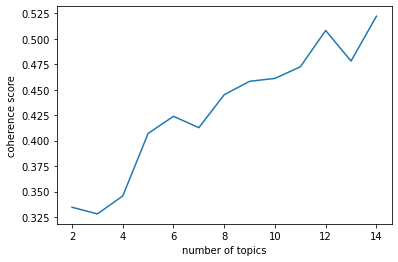

In [19]:
x = range(2,15)
plt.plot(x, coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [20]:
perplexity_values= []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

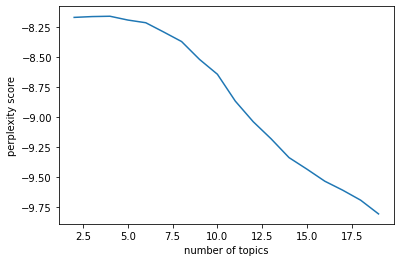

In [21]:
x=range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [24]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=12 , alpha=0.01, id2word=dictionary)

In [25]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.027*"항만" + 0.024*"사업" + 0.023*"해양" + 0.018*"공사" + 0.018*"인천" + 0.016*"부산" + 0.011*"개발" + 0.010*"안전" + 0.010*"선박" + 0.009*"시설" + 0.008*"지원" + 0.008*"협약" + 0.008*"관리" + 0.007*"화물" + 0.007*"물류" + 0.007*"부산항" + 0.007*"요소" + 0.007*"운영" + 0.007*"센터" + 0.006*"추진"'),
 (1,
  '0.016*"운임" + 0.016*"차관" + 0.015*"포스코" + 0.011*"공정" + 0.009*"선석" + 0.009*"위원회" + 0.009*"앵커" + 0.008*"시흥" + 0.007*"거래" + 0.006*"바닷속" + 0.006*"방송" + 0.006*"해운" + 0.006*"회의" + 0.006*"공동" + 0.005*"강릉" + 0.005*"사건" + 0.005*"보도" + 0.005*"해운업" + 0.004*"차이" + 0.004*"절차"'),
 (2,
  '0.023*"중공업" + 0.022*"현대" + 0.018*"조선" + 0.012*"미국" + 0.012*"한국" + 0.011*"해양" + 0.010*"수주" + 0.010*"시장" + 0.009*"기업" + 0.007*"조선업" + 0.007*"규모" + 0.006*"대표" + 0.006*"사업" + 0.006*"그룹" + 0.006*"내년" + 0.006*"국내" + 0.006*"삼성" + 0.005*"건조" + 0.005*"정부" + 0.005*"세계"'),
 (3,
  '0.014*"터널" + 0.013*"탄소" + 0.012*"환경" + 0.011*"해양" + 0.011*"생산" + 0.010*"에너지" + 0.009*"전남" + 0.009*"쓰레기" + 0.009*"수소" + 0.009*"배출" + 0.009*"기후" + 0.008*"위드" + 0.008*"해저" + 0.008*"

In [26]:
import pyLDAvis
import pyLDAvis.gensim_models

In [27]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
vis

/Users/yhkoo/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/yhkoo/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/yhkoo/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/yhkoo/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.025030  0.023757       1        1  14.300445
0     -0.097831  0.044141       2        1  12.931801
11    -0.105143 -0.069364       3        1  12.482239
10    -0.141921 -0.035842       4        1  10.810451
6     -0.081488  0.104106       5        1   8.398578
2     -0.046158 -0.117975       6        1   8.351675
5      0.060828  0.182834       7        1   7.785624
7     -0.002726  0.011014       8        1   6.405800
9      0.062559 -0.108570       9        1   6.044496
4      0.158061  0.101769      10        1   5.181690
3      0.003589 -0.020945      11        1   4.931518
1      0.215260 -0.114925      12        1   2.375684, topic_info=     Term         Freq        Total Category  logprob  loglift
470    항만  2122.000000  2122.000000  Default  30.0000  30.0000
103   중공업   987.000000   987.000000  Default  29.0000  29.0000
114    현대  1023.000000  1023.000000  Default  28.0000  28.0000
437    인천  1811.000000  1811.000000  Default  27.0000  27.0000
305    중국  1091.000000  1091.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
814    회의    64.440065   700.306148  Topic12  -5.1754   1.3541
622    보도    56.751877   429.674528  Topic12  -5.3024   1.7155
55     공동    62.763712   728.211477  Topic12  -5.2017   1.2887
1483  리포트    42.852765   317.186092  Topic12  -5.5833   1.7382
396    내용    42.505631   360.801953  Topic12  -5.5915   1.6012

[925 rows x 6 columns], token_table=      Topic      Freq Term
term                      
81        1  0.169447   가격
81        3  0.004133   가격
81        4  0.053727   가격
81        5  0.008266   가격
81        6  0.723250   가격
...     ...       ...  ...
1664     10  0.004190   훈련
3692      1  0.052732   흥원
3692      3  0.017577   흥원
3692      4  0.887657   흥원
3692      8  0.035155   흥원

[3844 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 12, 11, 7, 3, 6, 8, 10, 5, 4, 2])

In [28]:
rate = ldamodel.show_topic(10, topn=10000)
type(ldamodel.show_topic)
rate2 = pd.DataFrame(rate)
rate2.head(3)

,0,1
0,산업,0.015237
1,관광,0.014774
2,해양,0.013566


In [29]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()
    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 꺼내옴
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x : (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽 순으로 토픽을 정렬
        # 문서 0번 (1 30, 2 15, 3 10, 4 12.5) -> (1 30, 2 15, 4 12.5, 3 10)

        # 모든 문서에 대해 각각 아래 수행
        for j, (topic_num, prop_topic) in enumerate(doc): # 몇 번 토픽인지와 비중을 나누어 저장
            if j == 0: # 정렬했으므로 가장 앞에 있는 것이 가장 비중이 높음
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True) # 가장 비중이 높은 토픽, 가장 비중이 높은 토픽의 비중, 전체 토픽의 비중을 저장
            else:
                break
    return(topic_table)

In [30]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호를 의미하는 열로 사용하기 위해 인덱스 열을 만
topictable.columns=['문서번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중','각 토픽의 비중']
topictable[:10]

/var/folders/9c/dyfvcxrx45d7q0h1vnt_h6p40000gn/T/ipykernel_15672/2872493302.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
/var/folders/9c/dyfvcxrx45d7q0h1vnt_h6p40000gn/T/ipykernel_15672/2872493302.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)


,문서번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,4,0.8417,"[(4, 0.8416859), (5, 0.15561734)]"
1,1,7,0.6453,"[(3, 0.18548976), (7, 0.6453115), (9, 0.166395..."
2,2,11,0.8605,"[(0, 0.10662703), (7, 0.030662132), (11, 0.860..."
3,3,2,0.7966,"[(2, 0.79655796), (10, 0.20123222)]"
4,4,7,0.6800,"[(7, 0.6799977), (9, 0.31722787)]"
5,5,2,0.5741,"[(2, 0.57408786), (5, 0.21803394), (7, 0.06753..."
6,6,6,0.7442,"[(6, 0.74422246), (11, 0.2524567)]"
7,7,6,0.9961,"[(6, 0.99606764)]"
8,8,6,0.9979,"[(6, 0.9979146)]"
9,9,0,0.3947,"[(0, 0.39470997), (3, 0.039545674), (5, 0.2562..."


In [ ]:
# csv make
# topictable.tocsv('./', encoding='utf-8', index=False)